In [11]:
import algo
import datamodel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [12]:
fname = "Data/prices_round_1_day_-2.csv"
output = pd.read_csv(fname, index_col=False, sep=";")
times = output['timestamp'].unique()
dfs = {elem : {} for elem in times}
mtm_value = pd.DataFrame(index = output['timestamp'].unique())
for key in dfs.keys():
    df_temp = output[:][output['timestamp'] == key]
    products = df_temp['product'].unique()
    int_dfs = {elem : pd.DataFrame() for elem in products}
    for int_key in int_dfs:
        dfs[key][int_key] = df_temp[:][df_temp["product"] == int_key]




In [13]:
mtm_value.index.name = 'Time'
mtm_value['Cash'] = 0
mtm_value['Value'] = 0
for product in products:
    mtm_value["Cash_"+product]=0
    mtm_value["Value_"+product]=0
position = {}
trader = algo.Trader()
for time in times:
    print(time)
    listings = {}
    order_depths = {}
    own_trades = {}
    market_trades = {}
    observations = {}
    for product in dfs[time].keys():
        # print(dfs[time][product])
        depth = datamodel.OrderDepth()
        try:
            depth.buy_orders = {int(dfs[time][product]["bid_price_1"]):int(dfs[time][product]["bid_volume_1"]), int(dfs[time][product]["bid_price_2"]):int(dfs[time][product]["bid_volume_2"]), int(dfs[time][product]["bid_price_3"]):int(dfs[time][product]["bid_volume_3"])}
        except:
            try:
                depth.buy_orders = {int(dfs[time][product]["bid_price_1"]):int(dfs[time][product]["bid_volume_1"]), int(dfs[time][product]["bid_price_2"]):int(dfs[time][product]["bid_volume_2"])}
            except:
                depth.buy_orders = {int(dfs[time][product]["bid_price_1"]):int(dfs[time][product]["bid_volume_1"])}
        try:
            depth.sell_orders = {int(dfs[time][product]["ask_price_1"]):-int(dfs[time][product]["ask_volume_1"]), int(dfs[time][product]["ask_price_2"]):-int(dfs[time][product]["ask_volume_2"]), int(dfs[time][product]["ask_price_3"]):-int(dfs[time][product]["ask_volume_3"])}
        except:
            try:
                depth.sell_orders = {int(dfs[time][product]["ask_price_1"]):-int(dfs[time][product]["ask_volume_1"]), int(dfs[time][product]["ask_price_2"]):-int(dfs[time][product]["ask_volume_2"])}
            except:
                depth.sell_orders = {int(dfs[time][product]["ask_price_1"]):-int(dfs[time][product]["ask_volume_1"])}
        order_depths[product] = depth
    state = datamodel.TradingState(
                 timestamp= time,
                 listings= listings,
                 order_depths= order_depths,
                 own_trades= own_trades,
                 market_trades= market_trades,
                 position= position,
                 observations= observations)
    trades = trader.run(state = state)
    cash = mtm_value.loc[time]['Cash']
    # breakdown by product
    cash_bd = {}
    value_bd = {}
    for product in products:
        cash_bd[product]= mtm_value.loc[time]['Cash_'+product]
    for trade in trades:
        if trade not in position:
            try:
                position[trade] =  trades[trade][0].quantity
                cash += -trades[trade][0].quantity*trades[trade][0].price
                cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
            except:
                continue
        else:
            try:
                position[trade] += trades[trade][0].quantity
                cash += -trades[trade][0].quantity*trades[trade][0].price
                cash_bd[trade] += -trades[trade][0].quantity*trades[trade][0].price
            except:
                continue
    value = cash
    # breakdown by product
    for product in products:
        value_bd[product]= cash_bd[product]
    # mtm valuation using best price to have no net assets
    for asset, pos in position.items():
        if pos<0:
            value = value + pos*min(order_depths[asset].sell_orders.keys())
            value_bd[asset] += pos*min(order_depths[asset].sell_orders.keys())
        if pos>0:
            value = value + pos*max(order_depths[asset].sell_orders.keys())
            value_bd[asset] += pos*max(order_depths[asset].sell_orders.keys())

    mtm_value.loc[time]['Value'] = value
    mtm_value.loc[time]['Cash'] = cash
    for product in products:
        mtm_value.loc[time]['Cash_'+product] = cash_bd[product]
        mtm_value.loc[time]['Value_'+product] = value_bd[product]
    try:
        mtm_value.loc[time+100]['Cash'] = cash
        mtm_value.loc[time+100]['Value'] = cash
        for product in products:
            mtm_value.loc[time+100]['Cash_'+product] = cash_bd[product]
            mtm_value.loc[time+100]['Value_'+product] = value_bd[product]
    except:
        continue
    #print(trades)

        # print(time, product, dfs[time][product])

0
delta 4897.12 4898.18
delta 4897.12 4898.18
100
delta 4898.14 4900.24
delta 4898.14 4900.24
200
delta 4899.23 4902.42
delta 4899.23 4902.42
300
delta 4900.35 4904.58
delta 4900.35 4904.58
400
BUY PEARLS 3x 9998
delta 4901.41 4906.72
delta 4901.41 4906.72
500
delta 4902.49 4908.92
delta 4902.49 4908.92
600
delta 4903.57 4911.1
delta 4903.57 4911.1
700
delta 4904.64 4913.28
delta 4904.64 4913.28
800
delta 4905.7 4915.44
delta 4905.7 4915.44
900
delta 4906.77 4917.68
delta 4906.77 4917.68
1000
delta 4907.84 4919.84
delta 4907.84 4919.84
SELL PEARLS 1x 10002
1100
delta 4908.91 4922.0
delta 4908.91 4922.0
1200
delta 4910.0 4924.18
delta 4910.0 4924.18
1300
delta 4911.09 4926.38
delta 4911.09 4926.38
1400
delta 4912.17 4928.54
delta 4912.17 4928.54
BUY PEARLS 3x 9998
1500
delta 4913.24 4930.72
delta 4913.24 4930.72
1600
delta 4914.32 4932.9
delta 4914.32 4932.9
1700
delta 4915.37 4935.02
delta 4915.37 4935.02
1800
delta 4916.45 4937.18
delta 4916.45 4937.18
1900
delta 4917.53 4939.38
delta

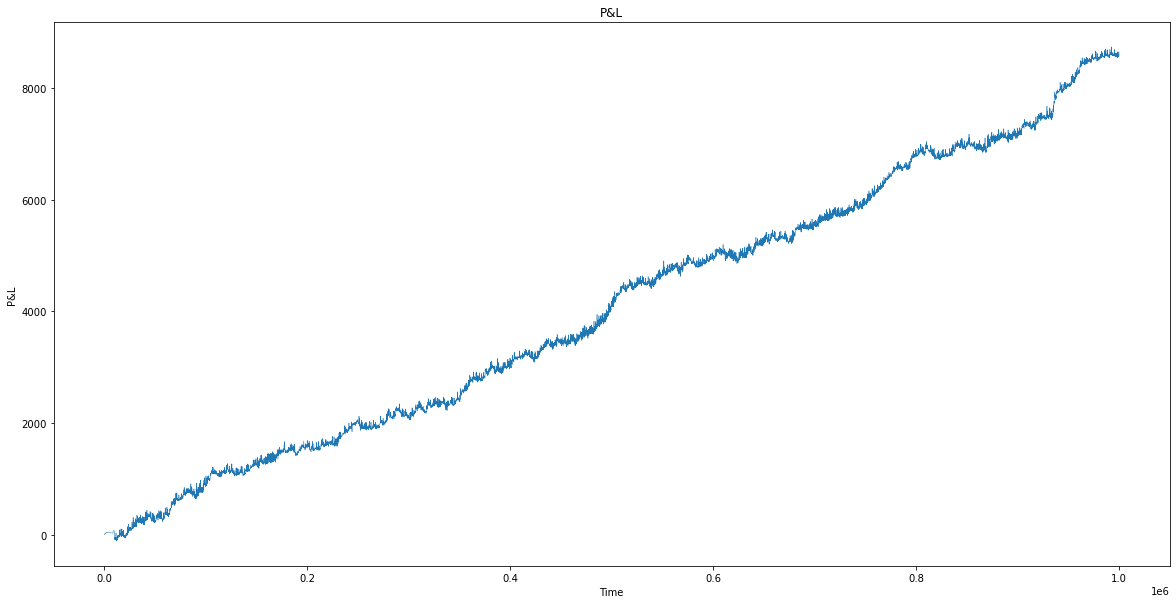

In [14]:
plt.plot(mtm_value['Value'] , linewidth = 0.5)
plt.xlabel('Time')
plt.ylabel('P&L')
plt.title('P&L')
plt.show()

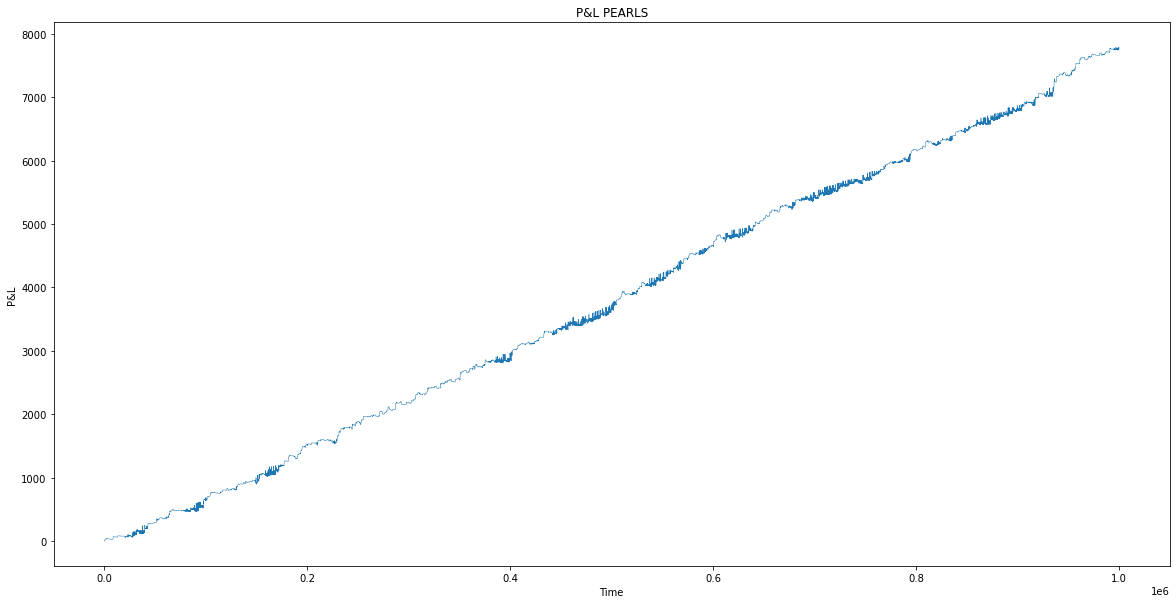

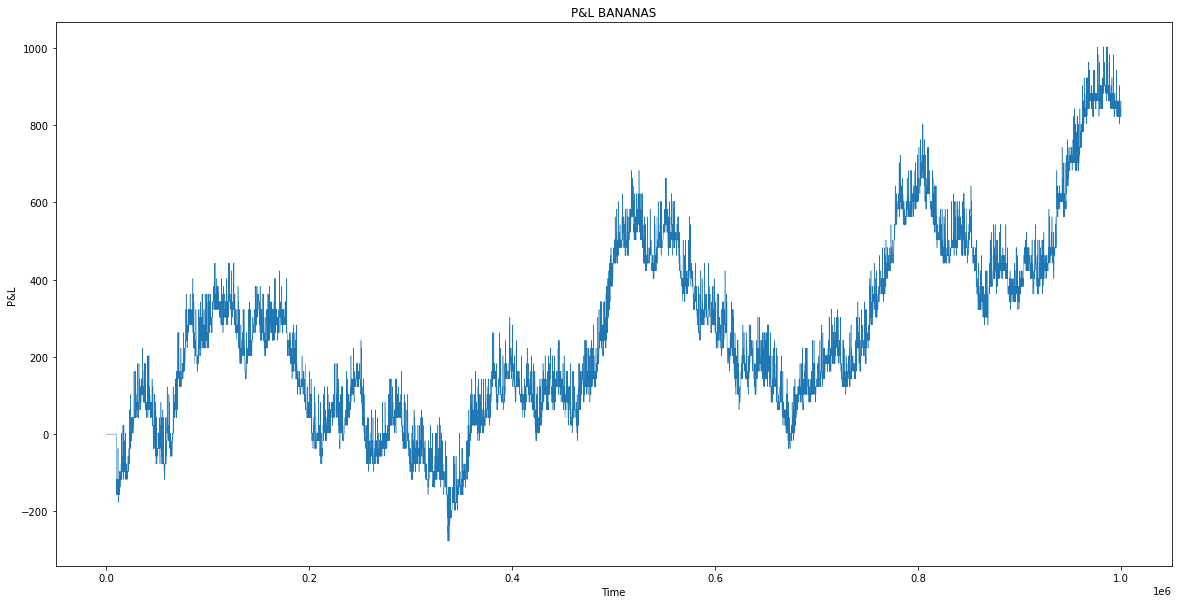

In [15]:
for product in products:
    plt.plot(mtm_value['Value_'+product] , linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('P&L')
    plt.title('P&L '+product)
    plt.show()